# Movie Correlation & Regression Analysis

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

# for data vizualization
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# for the regression analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Now let's take a look at the data
df = pd.read_csv(r'C:\Users\SAMSUNG\Documents\Portfolio_Project\Movies correlation\movies.csv')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#Checking Data Types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# checking what percentage of the dataset is represented by nulls

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


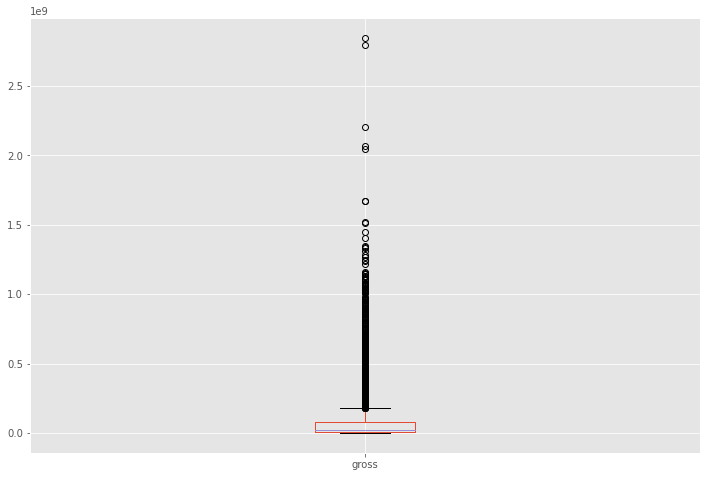

In [5]:
# Checking for outliers

df.boxplot(column=['gross'])

In [6]:
# drop NAs and duplicates

df.dropna(inplace=True)
df.drop_duplicates()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


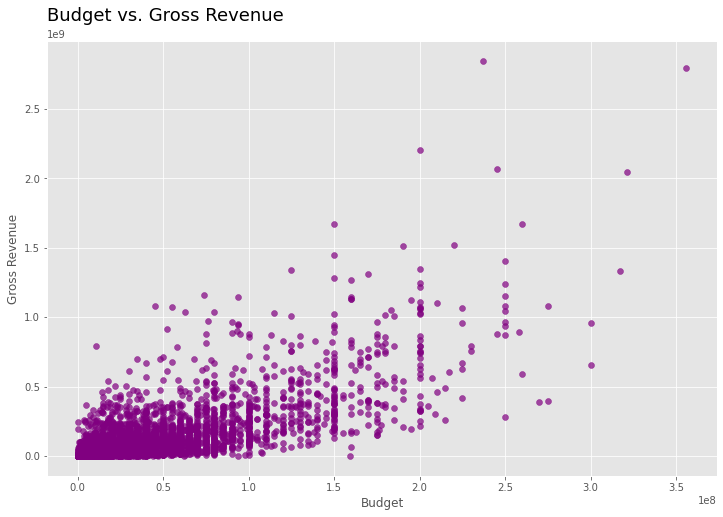

In [7]:
#Correlation analysis Budget vs. Gross Revenue

plt.scatter(x=df.budget, y=df.gross, color='purple', alpha=.7);
plt.title('Budget vs. Gross Revenue', loc='left', fontsize=18, pad=20);
plt.xlabel('Budget');
plt.ylabel('Gross Revenue');

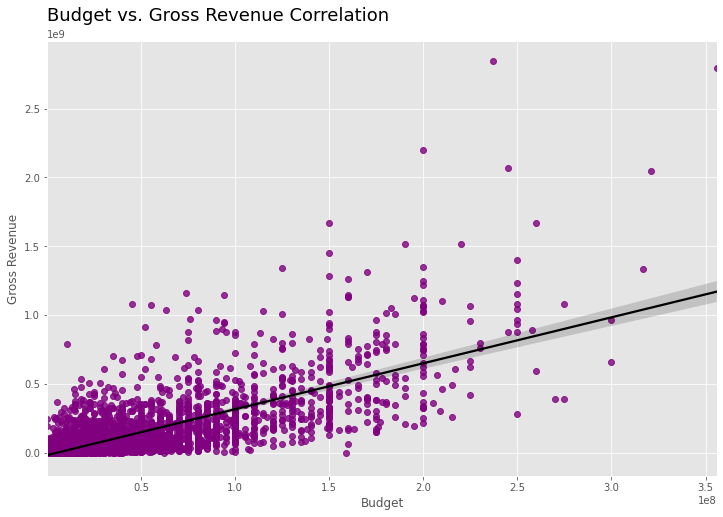

In [8]:
# regplot for a linear regression line

sns.regplot(data=df, x='budget', y='gross', color='purple', line_kws={'color':'black'});
plt.title('Budget vs. Gross Revenue Correlation', loc='left', fontsize=18, pad=20);
plt.xlabel('Budget');
plt.ylabel('Gross Revenue');

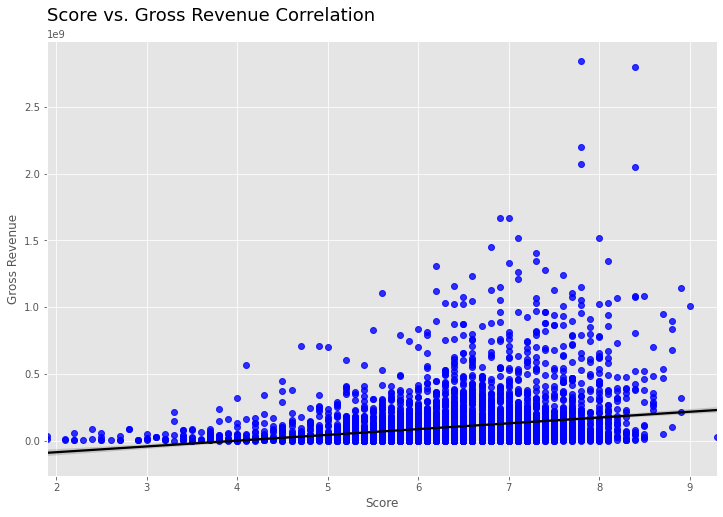

In [10]:
sns.regplot(data=df, x='score', y='gross', color='blue', line_kws={'color':'black'});
plt.title('Score vs. Gross Revenue Correlation', loc='left', fontsize=18, pad=20);
plt.xlabel('Score');
plt.ylabel('Gross Revenue');

In [11]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


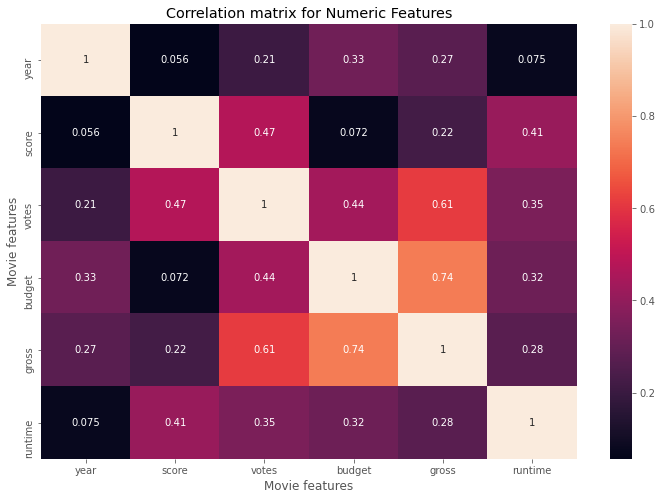

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [13]:
#Dealing with the categorical variables

df_copy = df.copy()

for col in df_copy.columns:
    if (df_copy[col].dtype == 'object'):
        df_copy[col] = df_copy[col].astype('category')
        df_copy[col] = df_copy[col].cat.codes

df_copy.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0


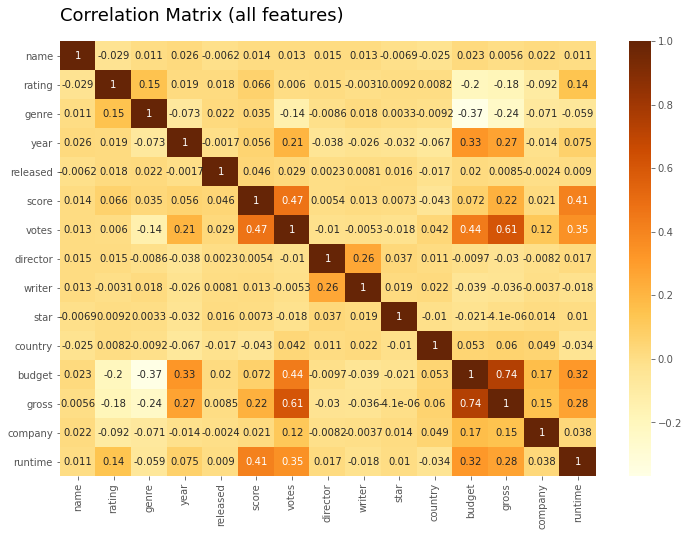

In [14]:
sns.heatmap(df_copy.corr(method='pearson'), annot=True, cmap='YlOrBr');
plt.title('Correlation Matrix (all features)', loc='left', fontsize=18, pad=20);

In [15]:
#Checking for high correlation

corr_mat = df_copy.corr().unstack().sort_values(ascending=False)
corr_mat[((corr_mat) > .2) & ((corr_mat) != 1)]

budget    gross       0.740247
gross     budget      0.740247
          votes       0.614751
votes     gross       0.614751
score     votes       0.474256
votes     score       0.474256
budget    votes       0.439675
votes     budget      0.439675
score     runtime     0.414068
runtime   score       0.414068
          votes       0.352303
votes     runtime     0.352303
budget    year        0.327722
year      budget      0.327722
budget    runtime     0.318695
runtime   budget      0.318695
          gross       0.275796
gross     runtime     0.275796
year      gross       0.274321
gross     year        0.274321
director  writer      0.261735
writer    director    0.261735
gross     score       0.222556
score     gross       0.222556
year      votes       0.206021
votes     year        0.206021
dtype: float64

In [16]:
# Regression Analysis
# defining feature matrix(X) and response vector(y)


X = df[['budget', 'votes', 'runtime', 'year', 'score']]
y = df.gross

In [17]:
# splitting X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [18]:
#Scale the independent variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# create linear regression object

reg = LinearRegression()

In [20]:
# train the model using the training sets

reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [21]:
# regression coefficients

coeff = pd.DataFrame(index=X.columns, columns=['Coefficients'], data=reg.coef_)
coeff

,Coefficients
budget,1.123683e+08
votes,6.249136e+07
runtime,-1.092701e+07
year,2.740740e+06
score,8.250097e+06


In [22]:
# mean absolute error (MAE), mean squared error (MSE),  R-Squared (Coefficient of Determination)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rsqrt = r2_score(y_test, predictions) * 100

print('MAE: {} \nMSE: {} \nRMSE: {} \nR-squared: {}'.format(mae, mse, rmse, rsqrt))
 

MAE: 58981425.474791534 
MSE: 1.1209581685526704e+16 
RMSE: 105875311.97369245 
R-squared: 67.79961722740842


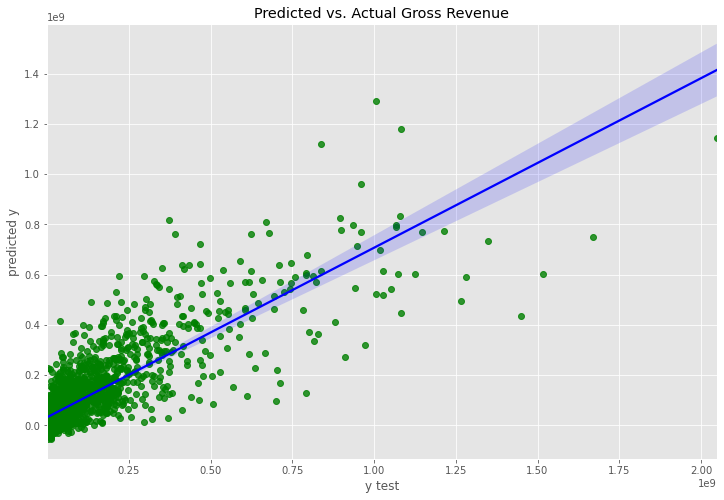

In [23]:
#The model can explain roughly 67% of the variability of the data

ax = sns.regplot(x=y_test, y=reg.predict(X_test),
                scatter_kws={'color': 'green'}, line_kws={'color':'blue'});
ax.set(xlabel='y test', ylabel='predicted y');
ax.set(title='Predicted vs. Actual Gross Revenue');

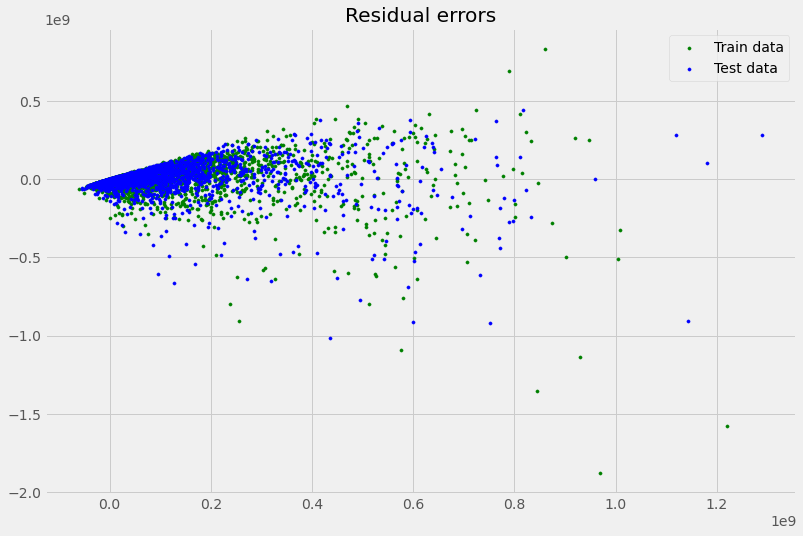

In [24]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()